In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style
import matplotlib as mpl
import math

#Set default figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Avenir'})



In [2]:
import lhapdf


In [3]:
p = lhapdf.mkPDF("MSHT20lo_as130", 0)
print(p.xfxQ2(21, 1e-3, 1e4))
for pid in p.flavors():
    print(p.xfxQ(pid, 0.01, 91.2))
# TODO: demonstrate looping over PDF set members
pset = lhapdf.getPDFSet("MSHT20lo_as130")
print(pset.description)
pcentral = pset.mkPDF(0)
pdfs1 = pset.mkPDFs()
pdfs2 = lhapdf.mkPDFs("MSHT20lo_as130") # a direct way to get all the set's PDFs


35.359061
0.2078408344797045
0.3026768795914984
0.44374930626969245
0.4801329593496786
0.6023119686511174
0.6762932710935856
0.6244264446045739
0.4436507526108974
0.3026768795914984
0.2078408344797045
8.223107970576706
"MSHT 2020 LO (68% C.L>). mem=0 => central value; mem=1-60 => 30 eigenvector sets (+/- directions). See Section 5.3.2 of arXiv:2012.04684 for error calculation. Web address: www.hep.ucl.ac.uk/msht"


In [4]:
import numpy as np
xs = [x for x in np.linspace(1e-5,1, 1000)]
q2s = [q for q in np.logspace(0, 3, 4)]
gluon_xfs = np.empty([len(xs), len(q2s)])
d_xfs = np.empty([len(xs), len(q2s)])
u_xfs = np.empty([len(xs), len(q2s)])
dbar_xfs = np.empty([len(xs), len(q2s)])
ubar_xfs = np.empty([len(xs), len(q2s)])
for ix, x in enumerate(xs):
    for iq, q2 in enumerate(q2s):
        d_xfs[ix,iq] = p.xfxQ2(1, x, q2)
        u_xfs[ix,iq] = p.xfxQ2(2, x, q2)
        dbar_xfs[ix,iq] = p.xfxQ2(-1, x, q2)
        ubar_xfs[ix,iq] = p.xfxQ2(-2, x, q2)
        gluon_xfs[ix,iq] = p.xfxQ2(21, x, q2)
#print(gluon_xfs[:,0])
#print(xs)
print(q2s)


[1.0, 10.0, 100.0, 1000.0]


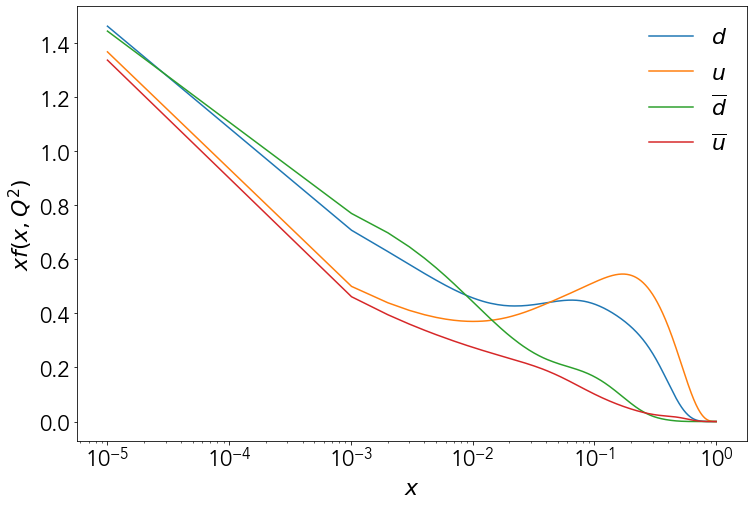

In [11]:
fig, ax = plt.subplots()
ax.plot(xs,d_xfs[:,1],label="$d$")
ax.plot(xs,u_xfs[:,1],label="$u$")
ax.plot(xs,dbar_xfs[:,1],label="$\overline{d}$")
ax.plot(xs,ubar_xfs[:,1],label="$\overline{u}$")
ax.set_xlabel("$x$")
ax.set_ylabel("$xf(x,Q^2)$")
ax.legend()
ax.set_xscale("log")
#ax.set_ylim([1e-12,1e3])

In [6]:
wi=0
fq=np.trapz(d_xfs[:,wi]+u_xfs[:,wi],dx=xs[1]-xs[0])
fqbar=np.trapz(dbar_xfs[:,wi]+ubar_xfs[:,wi],dx=xs[1]-xs[0])
fu=np.trapz(u_xfs[:,wi],dx=xs[1]-xs[0])
fd=np.trapz(d_xfs[:,wi],dx=xs[1]-xs[0])
fubar=np.trapz(u_xfs[:,wi],dx=xs[1]-xs[0])
fdbar=np.trapz(dbar_xfs[:,wi],dx=xs[1]-xs[0])

In [7]:
print(fq,fqbar)

0.48788329737225467 0.07658880790866768


In [8]:
import scipy.constants
def yNu(fq,fqbar,y,s):
    Gf=scipy.constants.physical_constants["Fermi coupling constant"]
    return (Gf[0]**2)*s*(fq+((1-y)**2)*fqbar)/(2*scipy.constants.pi)


def yNubar(fq,fqbar,y,s):
    Gf=scipy.constants.physical_constants["Fermi coupling constant"]
    return (Gf[0]**2)*s*(fqbar+((1-y)**2)*fq)/(2*scipy.constants.pi)


def yNup(fd,fubar,y,s):
    Gf=scipy.constants.physical_constants["Fermi coupling constant"]
    return (Gf[0]**2)*s*(fd+((1-y)**2)*fubar)/(scipy.constants.pi)


def yNubarp(fu,fdbar,y,s):
    Gf=scipy.constants.physical_constants["Fermi coupling constant"]
    return (Gf[0]**2)*s*(fdbar+((1-y)**2)*fu)/(scipy.constants.pi)

def yNun(fu,fdbar,y,s):
    Gf=scipy.constants.physical_constants["Fermi coupling constant"]
    return (Gf[0]**2)*s*(fu+((1-y)**2)*fdbar)/(scipy.constants.pi)


def yNubarn(fd,fubar,y,s):
    Gf=scipy.constants.physical_constants["Fermi coupling constant"]
    return (Gf[0]**2)*s*(fubar+((1-y)**2)*fd)/(scipy.constants.pi)
    

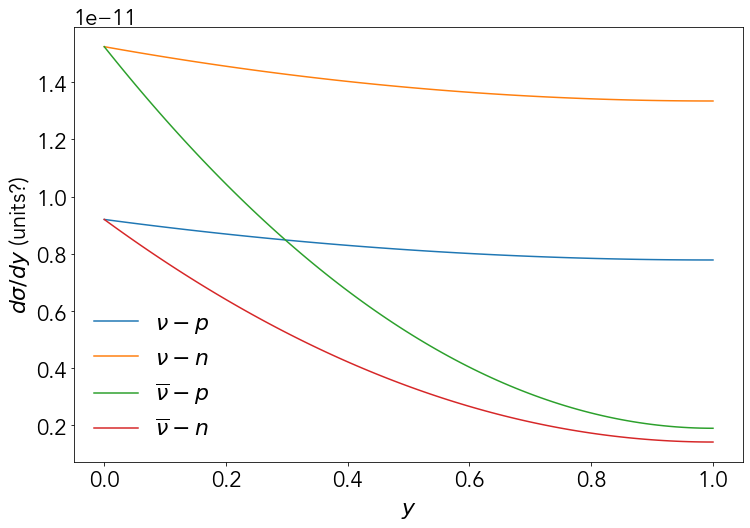

In [10]:
fig, ax = plt.subplots()
y=np.linspace(0,1,100)
ax.plot(y,yNup(fd,fubar,y,1),label=r'$\nu-p$')
ax.plot(y,yNun(fu,fdbar,y,1),label=r'$\nu-n$')
ax.plot(y,yNubarp(fu,fdbar,y,1),label=r'$\overline{\nu}-p$')
ax.plot(y,yNubarn(fd,fubar,y,1),label=r'$\overline{\nu}-n$')
ax.set_xlabel("$y$")
ax.set_ylabel("$d\sigma/dy$ (units?)")
ax.legend()